<h1>Downloading Datasets</h1>

In [ ]:
from google.colab import drive
tdrive.mount('/content/drive')

In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download praneet0327/fruits-50

In [ ]:
!unzip /content/fruits-50.zip

<h1>Importing Libraries</h1>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

<h1>Data Preprocessing</h1>

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Fruits-50',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(208,256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Fruits-50',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(208,256),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset="validation",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

#Building Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

<h1>Building Convolutional Layer</h1>

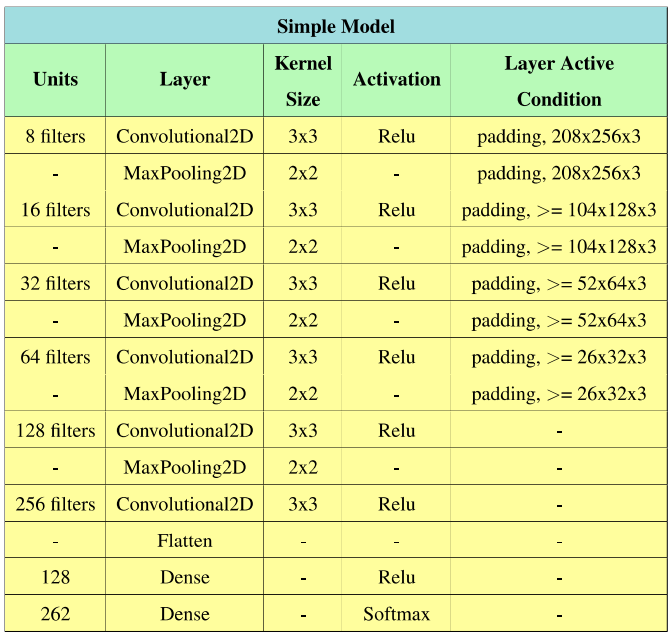

In [ ]:
# Create a Sequential model
cnn = tf.keras.models.Sequential()

# Add layers to the model
cnn.add(Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(208, 256, 3)))
cnn.add(MaxPooling2D((2, 2), padding='same'))

cnn.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2, 2), padding='same'))

cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2, 2), padding='same'))

cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D((2, 2), padding='same'))

cnn.add(Conv2D(128, (3, 3), activation='relu'))
cnn.add(MaxPooling2D((2, 2)))

cnn.add(Conv2D(256, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layer (50 classes with softmax activation)
cnn.add(tf.keras.layers.Dense(units=50,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(training_set,validation_data=validation_set,epochs=10,verbose=1)

#Saving Model

In [ ]:
import pickle
filename = 'trained_model.pkl'
pickle.dump(cnn, open(filename, 'wb'))

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
training_history.history #returns dictionary of history

In [ ]:
# recording history
import json
with open('training_hist.json','w') as f:
    json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

#Testing Phase

In [ ]:
from google.colab import files
files.download('/content/trained_model.pkl')

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
cnn = tf.keras.models.load_model('/content/drive/MyDrive/trained_model.h5')

In [ ]:
from skimage import io
image_path = "/content/Fruits-50/ambarella/11.jpg"
img = io.imread(image_path)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256),)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
prediction = cnn.predict(input_arr)


In [ ]:
print(prediction[0])
print(max(prediction[0]))

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/Fruits-50',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)


In [ ]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

In [ ]:
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

In [ ]:
print("It's {}".format(test_set.class_names[result_index[0][0]]))